In [18]:
import pandas as pd
import matplotlib.pyplot as mtplot
import numpy as np

In [19]:
original = pd.read_spss("survey_answers_translated.sav")

In [20]:
print(original.columns.tolist())

['timestamp', 'bfi1', 'bfi2', 'bfi3', 'bfi4', 'bfi5', 'bfi6', 'bfi7', 'bfi8', 'bfi9', 'bfi10', 'bfi11', 'bfi12', 'bfi13', 'bfi14', 'bfi15', 'bfi16', 'bfi17', 'bfi18', 'bfi19', 'bfi20', 'bfi21', 'bfi22', 'bfi23', 'bfi24', 'bfi25', 'bfi26', 'bfi27', 'bfi28', 'bfi29', 'bfi30', 'bfi31', 'bfi32', 'bfi33', 'bfi34', 'bfi35', 'bfi36', 'bfi37', 'bfi38', 'bfi39', 'bfi40', 'bfi41', 'bfi42', 'bfi43', 'bfi44', 'cfq1', 'cfq2', 'cfq3', 'cfq4', 'cfq5', 'cfq6', 'cfq7', 'cfq8', 'cfq9', 'cfq10', 'cfq11', 'cfq12', 'cfq13', 'cfq14', 'cfq15', 'cfq16', 'cfq17', 'cfq18', 'cfq19', 'cfq20', 'cfq21', 'cfq22', 'cfq23', 'cfq24', 'cfq25', 'dass_a1', 'dass_a2', 'dass_a3', 'dass_a4', 'dass_a5', 'dass_a6', 'dass_a7', 'sfpq_l1', 'sfpq_l2', 'sfpq_l3', 'sfpq_l4', 'sfpq_l5', 'sfpq_l6', 'sfpq_l7', 'sfpq_w1', 'sfpq_w2', 'sfpq_w3', 'sfpq_w4', 'sfpq_w5', 'sfpq_w6', 'sfpq_w7', 'age', 'gender', 'work_status', 'level_education', 'BFI_E', 'BFI_A', 'BFI_C', 'BFI_N', 'BFI_O', 'CFQ_total', 'DASS_A', 'SFPQ_W', 'SFPQ_L']


In [21]:
# Take a subset of columns
# We don't want individual items, or the B5.
# Just predicting anx. based on flow, CFQ and demographics.
anx_data = original.loc[
    :,
    ["age", "gender", "work_status", "level_education", "CFQ_total", "DASS_A", "SFPQ_W", "SFPQ_L"]
 ]

Visualizations

(array([114.,  61.,  40.,  21.,  16.,   7.,   5.,   6.,   0.,   3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

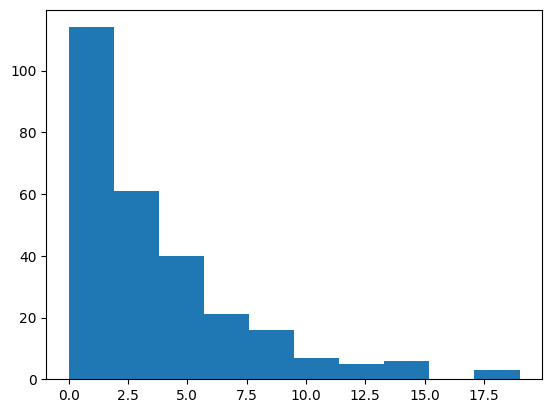

In [22]:
mtplot.hist(anx_data.DASS_A)

In [23]:
work_freq = anx_data.work_status.value_counts()

<BarContainer object of 2 artists>

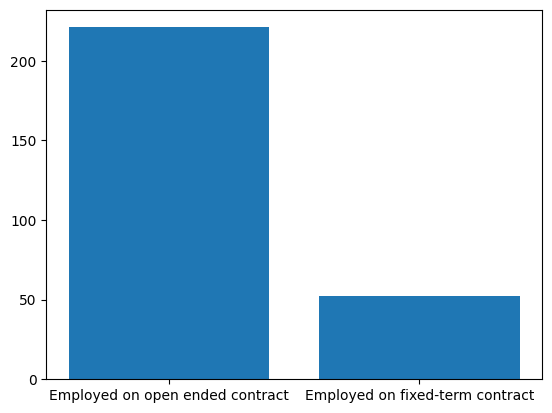

In [24]:
mtplot.bar(
    work_freq.index,
    work_freq.values
    )

(array([ 3., 20., 44., 78., 58., 40., 21.,  6.,  2.,  1.]),
 array([ 1. ,  9.8, 18.6, 27.4, 36.2, 45. , 53.8, 62.6, 71.4, 80.2, 89. ]),
 <BarContainer object of 10 artists>)

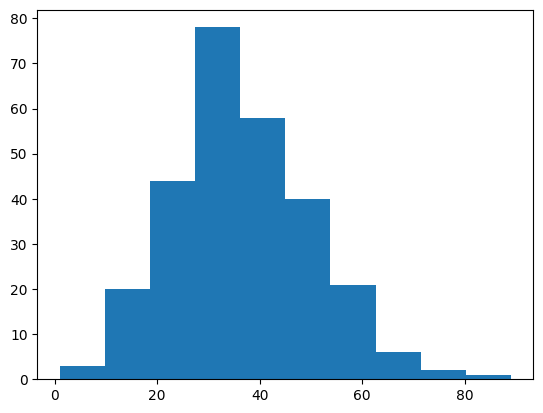

In [25]:
mtplot.hist(anx_data.CFQ_total)

(array([ 1., 10., 13., 26., 29., 33., 78., 44., 24., 15.]),
 array([1.71428571, 2.04285714, 2.37142857, 2.7       , 3.02857143,
        3.35714286, 3.68571429, 4.01428571, 4.34285714, 4.67142857,
        5.        ]),
 <BarContainer object of 10 artists>)

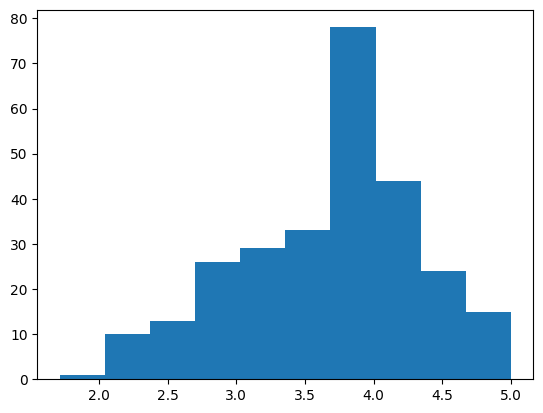

In [26]:
mtplot.hist(anx_data.SFPQ_W)

(array([ 1.,  3., 13., 15., 18., 63., 69., 57., 22., 12.]),
 array([1.57142857, 1.91428571, 2.25714286, 2.6       , 2.94285714,
        3.28571429, 3.62857143, 3.97142857, 4.31428571, 4.65714286,
        5.        ]),
 <BarContainer object of 10 artists>)

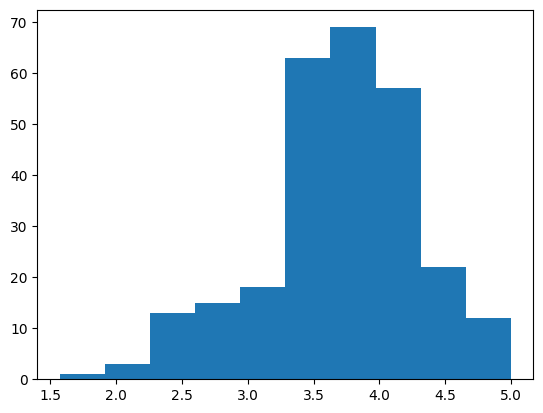

In [27]:
mtplot.hist(anx_data.SFPQ_L)

Some correlations

In [28]:
# Function to show a scatterplot with a fit line to better indicate correlations
def scatter_bestfit(x, y):
    # Find line of best fit
    a, b = np.polyfit(x,
        y,
        1)

    mtplot.scatter(
        x,
        y,
        alpha = 0.3
    )

    output = mtplot.plot(x,
                    a * x + b)
    
    return(output)

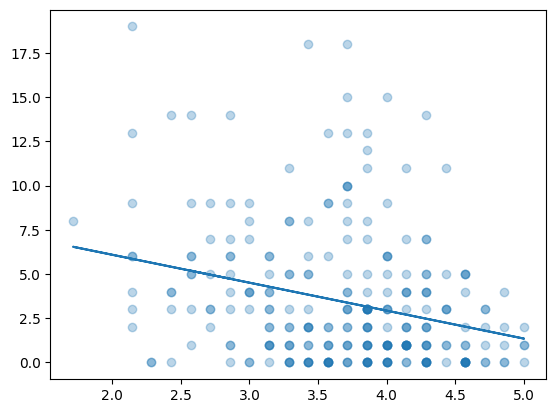

In [29]:
scatter_bestfit(
    anx_data.SFPQ_W,
    anx_data.DASS_A
)


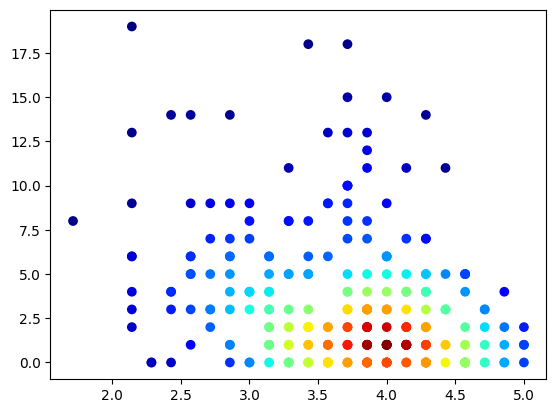

In [30]:
# https://stackoverflow.com/questions/19064772/visualization-of-scatter-plots-with-overlapping-points-in-matplotlib
# Heat-map like

# Doesn't actually help that much - the primary problem of DASS data being closely grouped on the low end
from scipy.stats import gaussian_kde as kde
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

flow_anx = anx_data.loc[:, ["SFPQ_W", "DASS_A"]]

densObj = kde(flow_anx.to_numpy().T)

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( flow_anx.to_numpy().T ) )

mtplot.scatter(anx_data.SFPQ_W,
    anx_data.DASS_A,
     color=colours )
     
mtplot.show()

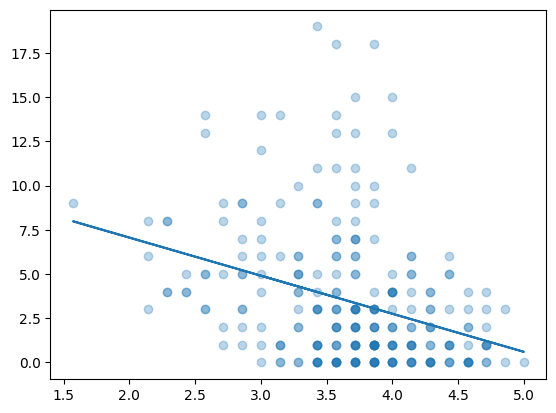

In [31]:
scatter_bestfit(
    anx_data.SFPQ_L,
    anx_data.DASS_A
)


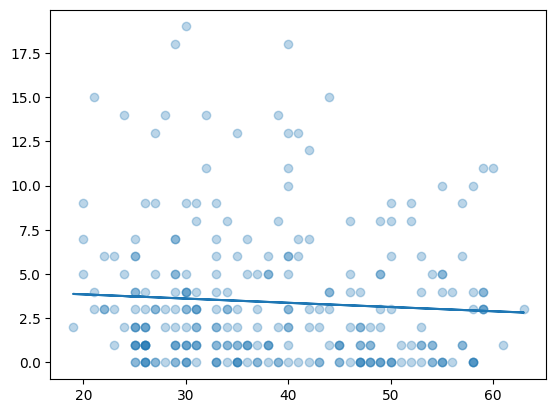

In [32]:
# Get indices of missing data. Filter to non-missing by inverting via ~
missings = anx_data.age.isna()

scatter_bestfit(
   anx_data.age[~missings],
   anx_data.DASS_A[~missings]
)

C:\Users\User\AppData\Local\Temp\ipykernel_15920\2051119223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

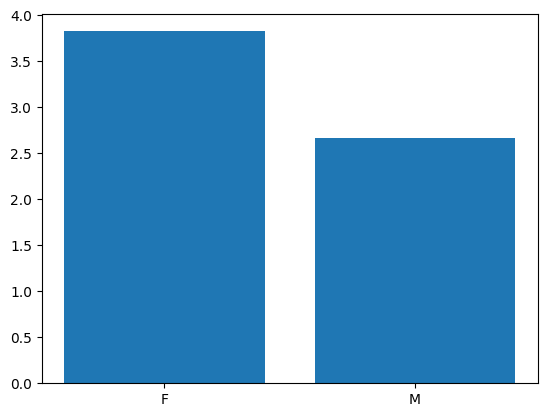

In [33]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

In [34]:
anx_data.gender

0      F
1      F
2      F
3      M
4      M
      ..
268    F
269    F
270    F
271    F
272    F
Name: gender, Length: 273, dtype: category
Categories (2, object): ['F', 'M']

C:\Users\User\AppData\Local\Temp\ipykernel_15920\2051119223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

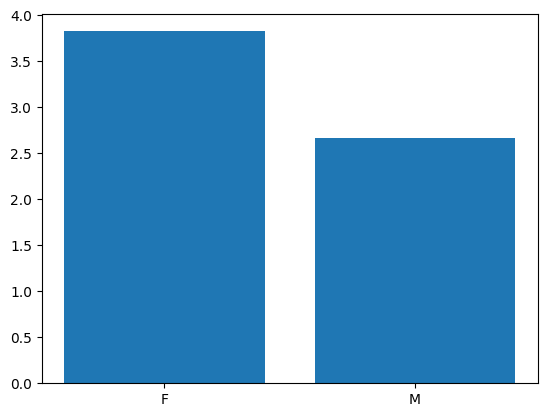

In [35]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_15920\1395598957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("work_status")["DASS_A"].mean()


<BarContainer object of 2 artists>

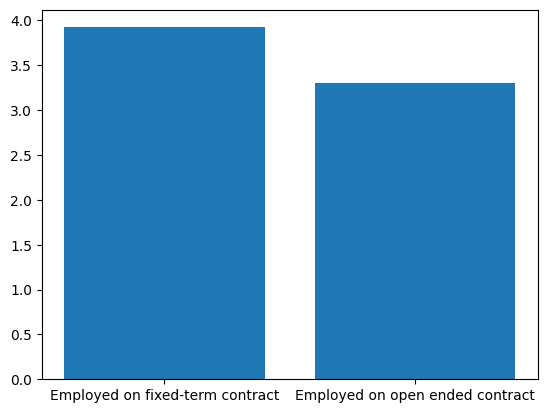

In [36]:
plot_data = anx_data.groupby("work_status")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_15920\1567939649.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("level_education")["DASS_A"].mean()


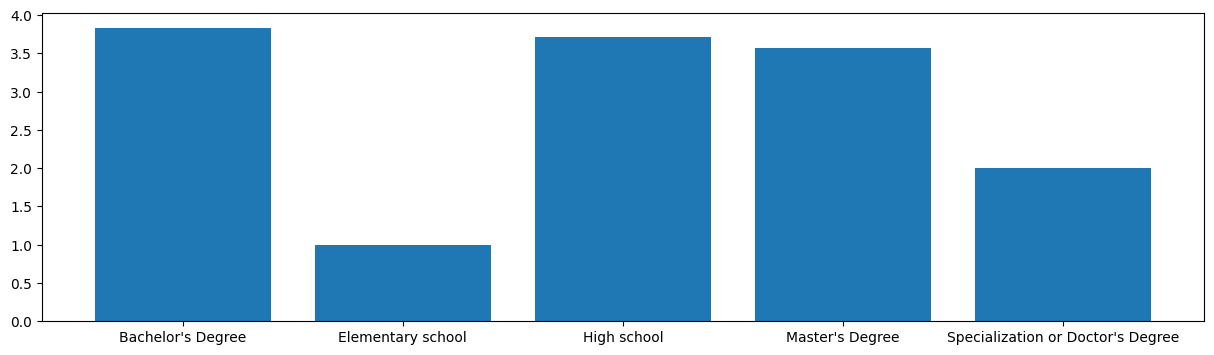

In [37]:
%matplotlib inline
mtplot.rcParams['figure.figsize'] = (15, 4)

plot_data = anx_data.groupby("level_education")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

# Restore size for new plots
mtplot.rcParams['figure.figsize'] = (8, 4)